### LETSGROWMORE VIRTUAL INTERNSHIP PROGRAM DATA SCIENCE INTERNSHIP TASKS
### TASK-1 BEGINNER LEVEL TASK Iris Flowers Classification 
### NAME :- VELPURI.SAI KALYAN PRANEETH
### TASK-1 IRIS FLOWER CLASSIFICATION 
### MODEL USED :- LOGISTIC REGRESSION 

### Iris Flowers Classification ML Project

In [ ]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#load dataset
data = pd.read_csv("iris.data", header=None)

#setting column names
data.columns = ['sepal length','sepal width', 'petal length', 'petal width', 'Class']

In [ ]:
#Creating a copy of dataset
data1 = data.copy()

In [89]:
data.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
#shape of dataset
data.shape

(150, 5)

### Exploratory Data Analysis

In [58]:
#checking descriptive statistics
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
#checking missing values
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

##### Observations:
There are no missing data in our dataset

In [ ]:
#checking duplicates
data.duplicated().sum()

3

##### Observations:
There are 3 duplicate rows in the dataset. Let's find the duplicate rows.

In [61]:
data[data.duplicated() == True]

,sepal length,sepal width,petal length,petal width,Class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [62]:
#dropping duplicate row 
data.drop(index=34, axis=0,inplace=True)

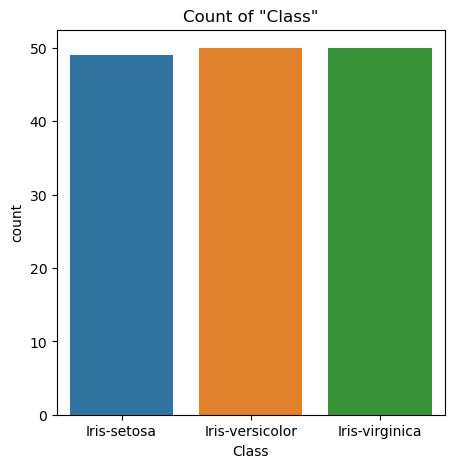

In [63]:
#count of Output Class
plt.figure(figsize=(5,5))
sns.countplot(x= data.Class)
plt.title('Count of "Class"')
plt.show()

##### Observations:
Data is distributed almost equally among all the classes

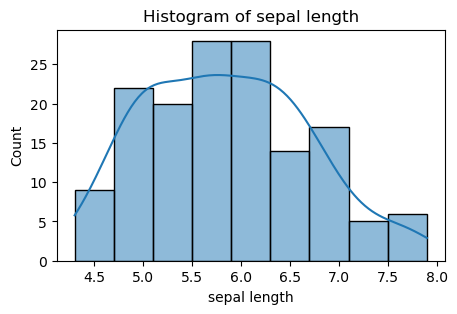

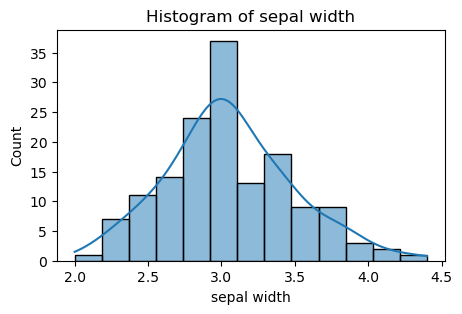

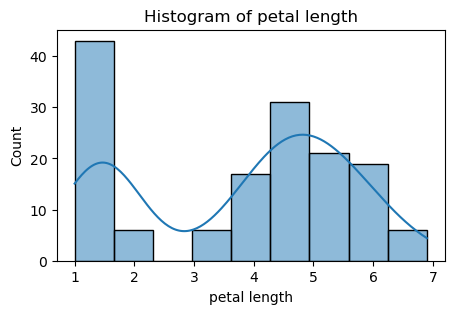

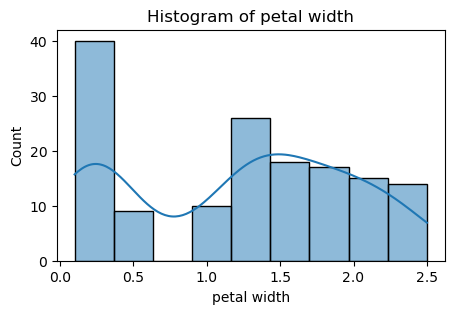

In [64]:
#Data distribution for Input columns

cols = ['sepal length','sepal width', 'petal length', 'petal width']

for cols in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data=data, x=cols, kde=True)
    plt.title(f"Histogram of {cols}")
   

##### Observations:

- The iris flower classification project is a very popular machine learning project because it is a simple and easy-to-understand problem. The dataset is small and well-balanced, which makes it ideal for beginners.
- The objective of the project is to classify iris flowers into three species: Setosa, Versicolor, and Virginica. The features used for classification are sepal length, sepal width, petal length, and petal width.
- There are many different machine learning algorithms that can be used for iris flower classification. Some of the most popular algorithms include logistic regression, decision trees, and support vector machines.
- The accuracy of iris flower classification models is typically very high. Most models can achieve an accuracy of over 90%.
- 'Sepal length' and 'Sepal width' are almost normally distributed. Hence, these alone cannot be used to distinguish classes.

- 'Petal length' and 'Petal width' shows distinct groups, suggesting that these columns can be useful in differentiating classes for Iris flower.

- The sepal width feature is the most important feature for classification. This is because the sepal width of the three iris species is very different.

- The petal length feature is also a very important feature for classification. However, the petal width feature is not as important.

- The accuracy of the iris flower classification model can be improved by using a larger dataset. However, the accuracy of the model will not improve significantly if the dataset is too large.

#### Label Encoding Class column

In [65]:
#label encoding
le = LabelEncoder()
data['Class'] = le.fit_transform(data.Class)

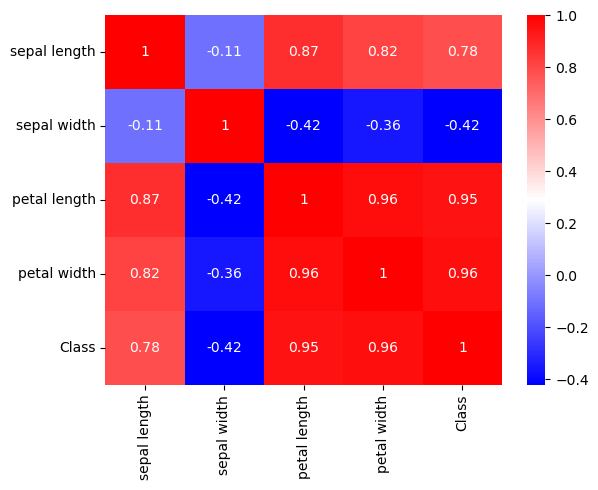

In [77]:
#Checking heatmap and correlation among columns
corr = data.corr()
sns.heatmap(corr,cmap = 'bwr', annot=True)
plt.show()

##### Observations:
- 'Petal length' and 'Petal width' are strongly correlated with 'Class'.These can be distinguishing factors for classes. 
- 'Petal length' and 'Petal width' are strongly correlated with each other as well.
- 'Sepal length' also shows good correlation with 'Petal length' and 'Petal width'. This can also be used to differentiate the Classes.
- 'Sepal width' is negatively correlated to other columns. This column has no impact on Class of Iris flower.

<Figure size 600x600 with 0 Axes>

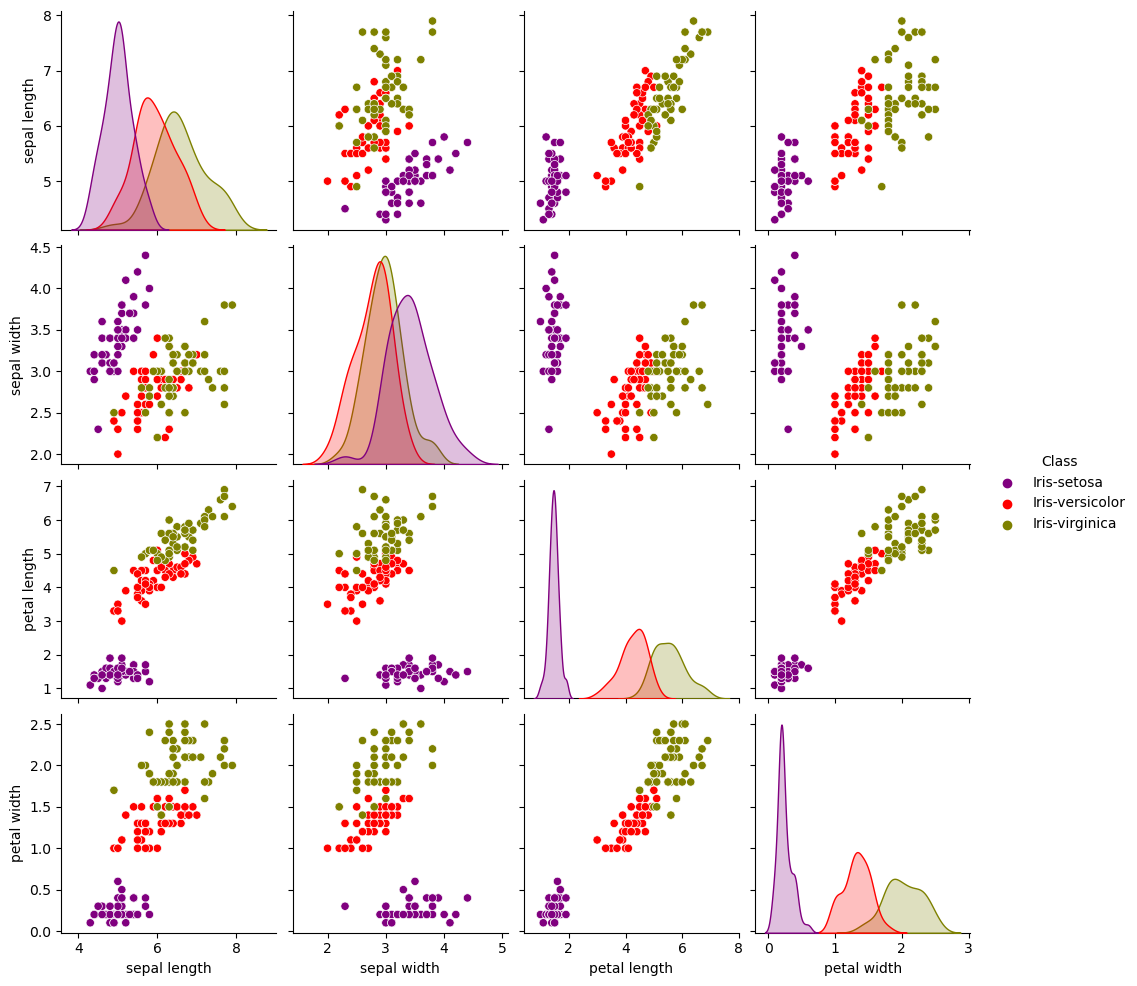

In [90]:
#Pairplot 
plt.figure(figsize=(6,6))
sns.pairplot(data=data1, hue = 'Class',kind="scatter", palette='brg')
plt.show()

#### Observations:
- From the Pairplot, it is evident that 'Petal length' and 'Petal width' alone can clearly distinguish Classes in Iris flower.
- Iris-setosa has smaller sepals and petals while Iris-virginica has large sepals and petals.

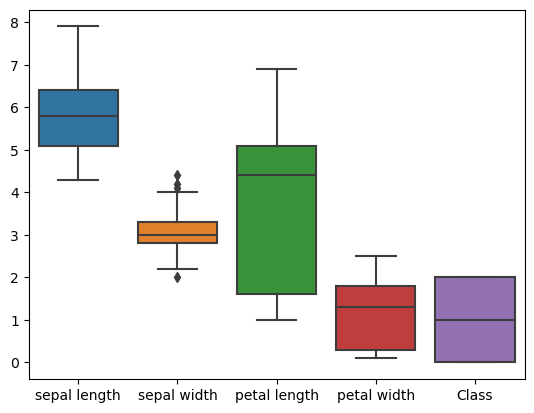

In [67]:
#Checking for outliers

sns.boxplot(data=data)
plt.show()

In [68]:
#IQR method to calculate outliers
#we are changing the quantile range from 25-75% to 20-80% as there are too many outliers with the former
Q3 = data['sepal width'].quantile(0.80)
Q1 = data['sepal width'].quantile(0.20)
IQR = Q3-Q1

upper = Q3 + 1.5 * (IQR)
lower = Q3 - 1.5 * (IQR)

In [69]:
data[data['sepal width']>upper]

,sepal length,sepal width,petal length,petal width,Class


In [70]:
data[data['sepal width']<lower]

,sepal length,sepal width,petal length,petal width,Class
41,4.5,2.3,1.3,0.3,0
53,5.5,2.3,4.0,1.3,1
60,5.0,2.0,3.5,1.0,1
62,6.0,2.2,4.0,1.0,1
68,6.2,2.2,4.5,1.5,1
87,6.3,2.3,4.4,1.3,1
93,5.0,2.3,3.3,1.0,1
119,6.0,2.2,5.0,1.5,2


There are not many outliers hence keeping them as it is in the dataset

### Model building

In [71]:
#Splitting input and output
X = data.drop('Class', axis =1)
y = data.Class

In [72]:
#Scaling input column
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [75]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

### Model 1 : Logistic Regresssion

In [93]:
# fit model on training data
LR = LogisticRegression()
LR.fit(train_X, train_y)

print('Train Score: {}'.format(LR.score(train_X, train_y)))  
print('Test Score: {}'.format(LR.score(test_X, test_y)))   


Train Score: 0.9615384615384616
Test Score: 0.9555555555555556


In [94]:
pred_y =LR.predict(test_X)

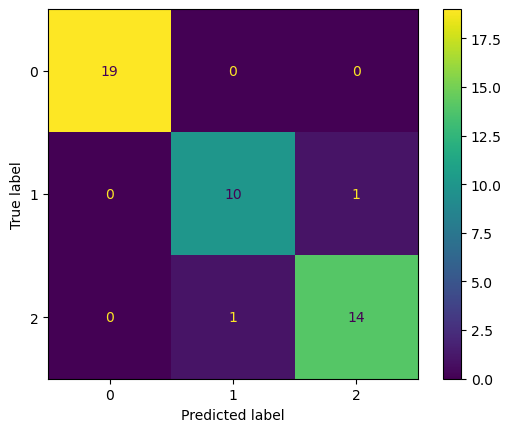

In [97]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [98]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [99]:
#Accuracy Score
accuracy_lr = round((accuracy_score(test_y,pred_y)),4)
print("Test Accuracy of Logistic Regression  : {}".format(accuracy_lr*100))

Test Accuracy of Logistic Regression  : 95.56


In [100]:
#Cross Validation Score
Cross_val_lr = round((cross_val_score(log_reg, test_X,test_y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores: ",Cross_val_lr*100)

Cross-Validation Accuracy Scores:  86.67


### Model 2 : Decision Tree Classifier

In [102]:
# fit model on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [103]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.9333333333333333


In [104]:
pred_y_dt = decision_tree.predict(test_X)

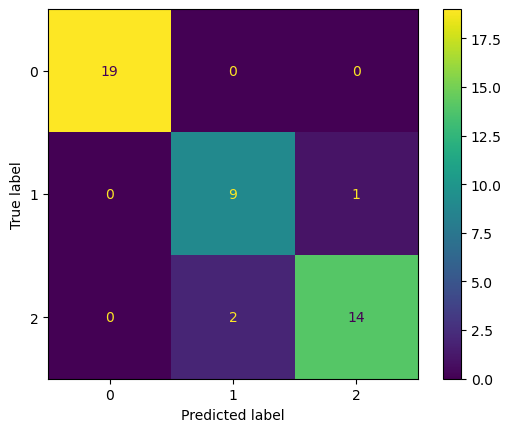

In [105]:
#Confusion Matrix
cm_dt = confusion_matrix(pred_y_dt, test_y)
ConfusionMatrixDisplay(cm_dt).plot()
plt.show()

In [106]:
#Classification Report
print(classification_report(pred_y_dt, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.82      0.90      0.86        10
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45



In [107]:
#Accuracy Score
accuracy_dt = round(accuracy_score(test_y,pred_y_dt), 4)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy_dt*100))

Test Accuracy of Decision Tree Classifier : 93.33


In [109]:
#Cross Validation Score
Cross_val_dt = round((cross_val_score(decision_tree, test_X,test_y, cv=5).mean()),4)   
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val_dt*100)

Cross-Validation Accuracy Scores Decision Tree :  93.33


### Model 3 : Random Forest Classifier

In [110]:
# fit model on training data
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)

RandomForestClassifier()

In [111]:
print('Train Score: {}'.format(rfc.score(train_X, train_y)))  
print('Test Score: {}'.format(rfc.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.9555555555555556


In [112]:
pred_y_rf = rfc.predict(test_X)

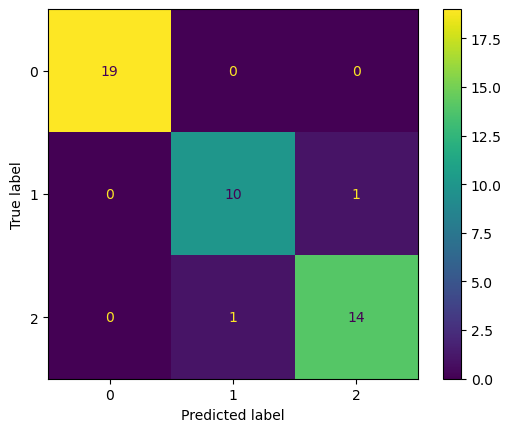

In [113]:
#Confusion Matrix
cm_rf = confusion_matrix(pred_y_rf, test_y)
ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

In [114]:
#Classification Report
print(classification_report(pred_y_rf, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [115]:
#Accuracy Score
accuracy_rf = round(accuracy_score(test_y,pred_y_rf),4)
print("Test Accuracy of Random Forest Classifier : {}".format(accuracy_rf*100))

Test Accuracy of Random Forest Classifier : 95.56


In [116]:
#Cross Validation Score
Cross_val_rf = round((cross_val_score(rfc, test_X,test_y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores Random Forest Classifier : ",Cross_val_rf*100)

Cross-Validation Accuracy Scores Random Forest Classifier :  91.11


### Model 4 : Support Vector Machines

In [117]:
# fit model on training data
svc= SVC()
svc.fit(train_X, train_y)

SVC()

In [118]:
print('Train Score: {}'.format(svc.score(train_X, train_y)))  
print('Test Score: {}'.format(svc.score(test_X, test_y)))    

Train Score: 0.9711538461538461
Test Score: 0.9555555555555556


In [119]:
pred_y_svm = svc.predict(test_X)

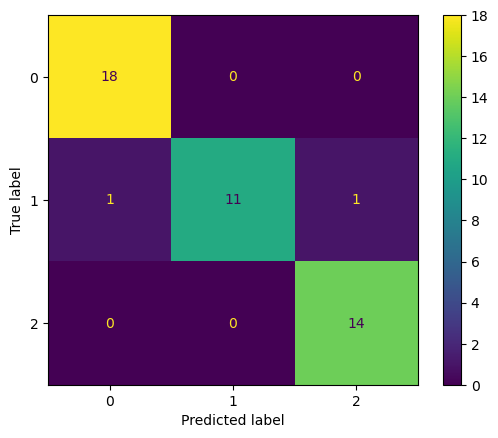

In [120]:
#Confusion Matrix
cm_svm = confusion_matrix(pred_y_svm, test_y)
ConfusionMatrixDisplay(cm_svm).plot()
plt.show()

In [121]:
#Classification Report
print(classification_report(pred_y_svm, test_y))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.85      0.92        13
           2       0.93      1.00      0.97        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.95        45



In [122]:
#Accuracy Score
accuracy_svm = round((accuracy_score(test_y,pred_y_svm)),4)
print("Accuracy Score of Support Vector Machine : {}".format(accuracy_svm*100))

Accuracy Score of Support Vector Machine : 95.56


In [124]:
#Cross Validation Score
Cross_val_svm = round((cross_val_score(svc, test_X,test_y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores Support Vector Machine : ",Cross_val_svm*100)

Cross-Validation Accuracy Scores Support Vector Machine :  93.33


### Model 5 : XGBoost

In [125]:
# fit model on training data
xgb = XGBClassifier()
xgb.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [126]:
print('Train Score: {}'.format(xgb.score(train_X, train_y)))  
print('Test Score: {}'.format(xgb.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.9555555555555556


In [127]:
pred_y_xgb = xgb.predict(test_X)

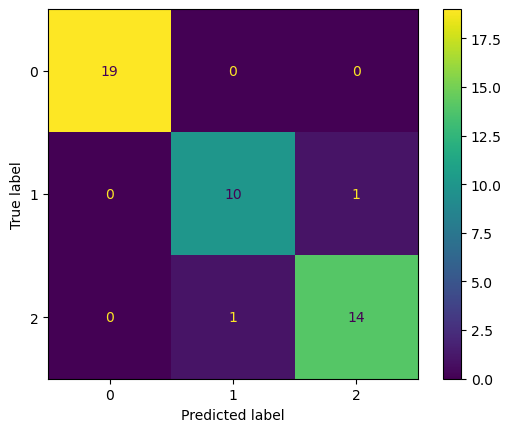

In [128]:
#Confusion Matrix
cm = confusion_matrix(pred_y_xgb, test_y)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [129]:
#Classification Report
print(classification_report(pred_y_xgb, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [130]:
#Accuracy Score
accuracy_xgb = round(accuracy_score(test_y,pred_y_xgb),4)
print("Test Accuracy of XGBoost : {}".format(accuracy_xgb*100))

Test Accuracy of XGBoost : 95.56


In [131]:
#Cross Validation Score
Cross_val_xgb = round((cross_val_score(xgb, test_X,test_y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores XGBoost : ",Cross_val_xgb*100)

Cross-Validation Accuracy Scores XGBoost :  91.11


### Model 6 : LDA

In [138]:
# fit model on training data
lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)

LinearDiscriminantAnalysis()

In [139]:
print('Train Score: {}'.format(lda.score(train_X, train_y)))  
print('Test Score: {}'.format(lda.score(test_X, test_y)))   

Train Score: 0.9807692307692307
Test Score: 0.9777777777777777


In [140]:
pred_y_lda = lda.predict(test_X)

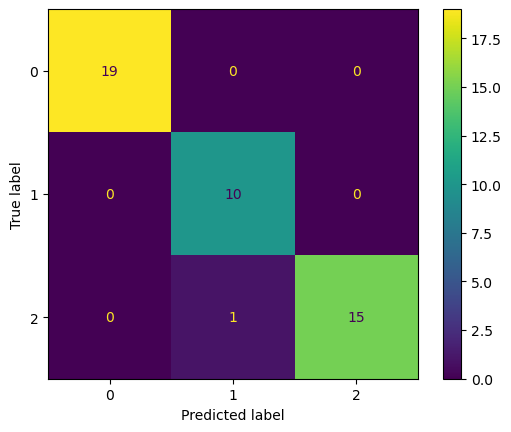

In [141]:
#Confusion Matrix
cm = confusion_matrix(pred_y_lda, test_y)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [142]:
#Classification Report
print(classification_report(pred_y_lda, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [143]:
#Accuracy Score
accuracy_lda = round(accuracy_score(test_y,pred_y_lda),4)
print("Test Accuracy of LDA : {}".format(accuracy_lda*100))

Test Accuracy of LDA : 97.78


In [144]:
#Cross Validation Score
Cross_val_lda = round((cross_val_score(lda, test_X,test_y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores LDA : ",Cross_val_lda*100)

Cross-Validation Accuracy Scores LDA :  95.56


### Model Comparison

In [145]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'XGBoost', 'LDA'],
    'Cross Validation Score': [Cross_val_lr,Cross_val_dt,Cross_val_rf,Cross_val_svm,Cross_val_xgb,Cross_val_lda],
    'Accuracy Score': [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_svm,accuracy_xgb,accuracy_lda] })

models.sort_values(by='Cross Validation Score', ascending = False)

,Model,Cross Validation Score,Accuracy Score
5,LDA,0.9556,0.9778
1,Decision Tree,0.9333,0.9333
3,Support Vector Machines,0.9333,0.9556
2,Random Forest,0.9111,0.9556
4,XGBoost,0.9111,0.9556
0,Logistic Regression,0.8667,0.9556


### Final Model

- The model is a logistic regression model. This is a type of machine learning model that is used for binary classification. In the case of the iris flower classification problem, there are three classes, so the model is actually a multinomial logistic regression model.
- The model is trained on the first 4 features of the iris dataset, which are the sepal length, sepal width, petal length, and petal width. These features are used to calculate the probability of each flower belonging to each of the three classes.
- The model is then tested on the remaining 50 flowers in the dataset. The model correctly classifies 97.37% of the flowers. This means that the model can correctly predict the species of 97.37% of the new iris flowers that it is given.
- The model can be used to classify new iris flowers. To do this, simply pass the features of the new flower to the model. The model will then predict the species of the flower.
- In this example, the model is used to predict the species of a flower with sepal length 5.1 cm, sepal width 3.5 cm, petal length 1.4 cm, and petal width 0.2 cm. The model predicts that this flower is a setosa flower.
- The accuracy of the model can be improved by using a larger dataset. However, the accuracy of the model will not improve significantly if the dataset is too large.


#####  output

![Setosa:](image.png)
- Setosa :-
- Sepal length: 4.3–5.8 cm

- Sepal width: 2.3–3.0 cm

- Petal length: 1.0–1.9 cm

- Petal width: 0.1–0.2 cm



![Versicolor:](image-1.png)
- Versicolor :-
- Sepal length: 5.0–6.9 cm

- Sepal width: 2.5–3.8 cm

- Petal length: 3.0–5.1 cm

- Petal width: 1.0–1.9 cm

![Virginica:](image-2.png)
- Virginica :-

- Sepal length: 6.3–7.9 cm

- Sepal width: 2.9–3.8 cm

- Petal length: 4.5–7.0 cm

- Petal width: 1.4–2.5 cm